# Problem 1:
There are various stocks for which we have collected a data set, which all stocks areapparently similar in performance
# Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.
# Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.


In [1]:
#import lib
import factor_analyzer
from factor_analyzer import FactorAnalyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.Load data

In [2]:
df =  pd.read_csv('./data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.shape

(41266, 502)

In [5]:
df.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [6]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


### 2. Explicitly checking null values

In [7]:

for name in df.columns:
    if df[name].isnull().sum() > 0:
        print(name)
    else:
#         print('No null values')
        pass

Observation: After looking over the std in describe we can observed that features like Date and SP500 are as outliers, so drop both

### 3. Explicitly checking types of data in each feature

In [8]:
for name in df.columns:
    if np.dtype(df[name])=='object':
        print(name)
    else:
#         print('No null values')
        pass

In [9]:
#Droping Date and SP500
#way 1 for drop
df.drop('DATE', axis=1, inplace=True)

#way 2 as pop
df.pop('SP500')

0        2363.6101
1        2364.1001
2        2362.6799
3        2364.3101
4        2364.8501
5        2365.6201
6        2365.2000
7        2365.2900
8        2364.3201
9        2364.6399
10       2364.5801
11       2364.4800
12       2365.2300
13       2365.6599
14       2365.2400
15       2365.3201
16       2364.9600
17       2364.3999
18       2364.7400
19       2363.9399
20       2363.8799
21       2363.6001
22       2364.0400
23       2363.8301
24       2363.8501
25       2363.0300
26       2363.2500
27       2362.8701
28       2363.0300
29       2363.0601
           ...    
41236    2473.1001
41237    2473.7600
41238    2473.8201
41239    2473.8899
41240    2474.0701
41241    2474.1499
41242    2474.5000
41243    2474.6101
41244    2474.5100
41245    2474.4900
41246    2474.7800
41247    2474.8201
41248    2474.8999
41249    2474.5200
41250    2473.3201
41251    2473.3201
41252    2473.6101
41253    2473.1001
41254    2473.3501
41255    2472.5100
41256    2471.8899
41257    247

In [10]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [11]:
df.info()   # all columns are of float type means fully numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 500 entries, NASDAQ.AAL to NYSE.ZTS
dtypes: float64(500)
memory usage: 157.4 MB


**Observation:** There are no null values now and but a huge column set as features so applying factor Analysis first for more findings towards feature selection and extraction

# Problem 1

## =====Factor Analysis (in factor_analyzer way)=====

In [12]:
from sklearn.preprocessing import StandardScaler


#### Getting Feature matrix

In [13]:
x = df.values

In [14]:
x.shape

(41266, 500)

In [15]:
#original x
x[:5]

array([[ 42.33  , 143.68  , 129.63  , ...,  63.86  , 122.    ,  53.35  ],
       [ 42.36  , 143.7   , 130.32  , ...,  63.74  , 121.77  ,  53.35  ],
       [ 42.31  , 143.6901, 130.225 , ...,  63.75  , 121.7   ,  53.365 ],
       [ 42.37  , 143.64  , 130.0729, ...,  63.88  , 121.7   ,  53.38  ],
       [ 42.5378, 143.66  , 129.88  , ...,  63.91  , 121.695 ,  53.24  ]])

#### scaling the feature matrix

In [16]:

sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
#scaled x
x[:5]

array([[-1.65013444, -1.08607297, -1.68982378, ..., -1.95578373,
         0.10281519, -2.04188417],
       [-1.64093012, -1.08286618, -1.59006459, ..., -1.98549977,
         0.06179505, -2.04188417],
       [-1.65627065, -1.08445354, -1.60379955, ..., -1.98302344,
         0.04931066, -2.03740234],
       [-1.63786201, -1.09248657, -1.62578995, ..., -1.95083106,
         0.04931066, -2.03292051],
       [-1.58637916, -1.08927977, -1.65367915, ..., -1.94340205,
         0.04841892, -2.07475093]])

#### Calculating Eligibality for factor analysis

##### Kaiser-Meyer-Olkin (KMO) 
Calculate the Kaiser-Meyer-Olkin criterion for items and overall. This statistic represents the degree to which each observed variable is predicted, without error, by the other variables in the dataset. In general, a KMO < 0.6 is considered inadequate.

Parameters:	x (array-like) – The array from which to calculate KMOs.

Returns:	

kmo_per_variable (numpy array) – The KMO score per item.

kmo_total (float) – The KMO score overall. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model_total=calculate_kmo(x)

kmo_model_total   # overall kmo score

0.991933678084343

#### Observation:
.99 is good, and suitable for factor analysis,More than .60 is good KMO score for applying factor analysis

In [19]:
len(kmo_all) #kmo_all is feature-wise kmo score

500

#### Initially applying factor analyzer with n_factors=250 

In [20]:
fa = FactorAnalyzer(n_factors=250, rotation='varimax')
fa

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=250, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [21]:
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=250, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

#### Calulating Eigen Values

In [22]:
ev, v = fa.get_eigenvalues()
ev[:10], len(ev)

(array([235.15287266,  86.16187476,  60.10215269,  24.27243163,
         18.9939518 ,  14.04008239,  10.00219463,   6.53108362,
          5.24484774,   3.75846909]), 500)

In [23]:
fa.loadings_

array([[ 0.64583918,  0.54287832,  0.28718498, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62187007, -0.57062943, -0.15047348, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92112755, -0.20635601,  0.21436648, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.9858181 , -0.04473524,  0.08256128, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03551257,  0.89121847,  0.24692803, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93129791,  0.31007809, -0.09193789, ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
x.shape

(41266, 500)

#### Elbow method for finding suitable n_factors=? value

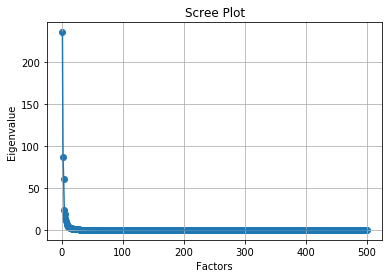

In [25]:
# Create scree plot using matplotlib
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [26]:
fa = FactorAnalyzer(n_factors=20,rotation="varimax")
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=20, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [27]:
factor = []
for i in range(1,21):
    factor.append('Factor'+str(i))

In [28]:
df1 = pd.DataFrame(fa.loadings_, index=df.columns, columns=factor)

In [29]:
df1

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
NASDAQ.AAL,0.654142,0.528722,0.291797,-0.081212,0.070456,0.055473,0.166194,-0.024165,-0.281633,-0.081767,0.178080,0.014274,0.118843,-0.040292,-0.013853,-0.026357,-0.027555,-0.020762,0.025668,-0.038111
NASDAQ.AAPL,0.612500,-0.587705,-0.139952,-0.168344,0.379059,-0.031839,-0.012400,0.094847,0.095314,-0.072592,0.081479,0.026842,0.012688,-0.085065,-0.097403,0.081672,-0.025310,-0.036542,-0.063424,-0.011874
NASDAQ.ADBE,0.912742,-0.225127,0.231362,-0.016695,0.114923,0.127362,-0.086881,-0.055775,0.077702,0.021470,0.056986,-0.018457,0.034882,-0.016028,-0.023952,-0.010556,-0.022828,-0.031185,-0.018807,0.027911
NASDAQ.ADI,0.277321,0.132896,-0.336324,0.110090,0.331226,0.557768,-0.126118,0.208650,0.028307,-0.105124,0.168552,-0.104094,0.136879,0.077502,0.103553,0.104628,-0.147667,-0.003897,0.031031,-0.080584
NASDAQ.ADP,0.322975,-0.368226,0.574868,0.170699,0.052756,0.086276,0.341737,0.033827,-0.074413,0.131949,-0.037531,0.052227,0.083954,-0.061424,0.402043,0.057613,0.097155,0.092191,0.039540,-0.036119
NASDAQ.ADSK,0.926484,-0.018460,-0.093815,-0.010126,0.197521,0.215365,0.031143,0.027572,-0.052173,0.040206,-0.024078,0.080568,0.040317,0.070198,0.068141,-0.007759,0.004521,-0.027423,-0.019006,0.003356
NASDAQ.AKAM,-0.867046,0.178860,0.207416,0.165388,-0.004121,-0.052202,-0.092255,-0.128813,0.013209,0.227615,0.085689,-0.101111,0.066909,0.020844,-0.071638,-0.038253,0.077100,0.014474,-0.001709,0.028239
NASDAQ.ALXN,0.274858,-0.452380,0.687150,-0.099872,-0.109579,-0.249070,-0.093222,-0.051619,0.235072,0.059663,-0.208500,-0.047351,0.034758,-0.089751,-0.033459,0.048818,-0.060673,0.053045,0.089585,-0.016040
NASDAQ.AMAT,0.816501,0.240748,-0.110057,-0.110320,0.453250,0.101382,-0.032615,-0.055665,-0.053538,-0.028088,0.016588,-0.090960,-0.034030,0.079479,0.007296,0.006952,-0.008342,-0.020636,-0.002571,-0.033095
NASDAQ.AMD,0.007696,0.093601,0.711426,0.167482,-0.086415,0.362329,0.002720,-0.118187,-0.015738,0.047307,0.046853,-0.423450,0.142825,-0.023325,0.059742,0.168793,0.035144,-0.085474,-0.057871,0.060557


In [30]:
fa.get_communalities()[:10]

array([0.97328923, 0.97373621, 0.99254643, 0.82684618, 0.95133928,
       0.97855599, 0.96998953, 0.97981846, 0.99017058, 0.9482746 ])

### Retained Variance by Factor Analysis

In [31]:
# Get variance of each factors
variance=fa.get_factor_variance()


d={'SS Loadings':variance[0],'Proportion Var':variance[1],'Cumulative_Var':variance[2]}

In [32]:
df_variance= pd.DataFrame(data=d, index=factor)

In [33]:
df_variance

,SS Loadings,Proportion Var,Cumulative_Var
Factor1,213.534401,0.427069,0.427069
Factor2,87.504900,0.175010,0.602079
Factor3,77.865981,0.155732,0.757811
Factor4,19.915659,0.039831,0.797642
Factor5,17.889164,0.035778,0.833420
Factor6,13.826675,0.027653,0.861074
Factor7,10.443021,0.020886,0.881960
Factor8,7.124886,0.014250,0.896209
Factor9,5.229724,0.010459,0.906669
Factor10,4.405141,0.008810,0.915479


### Observation:
we can observe that the `Cumulative Var` retains 96% in 20 factors

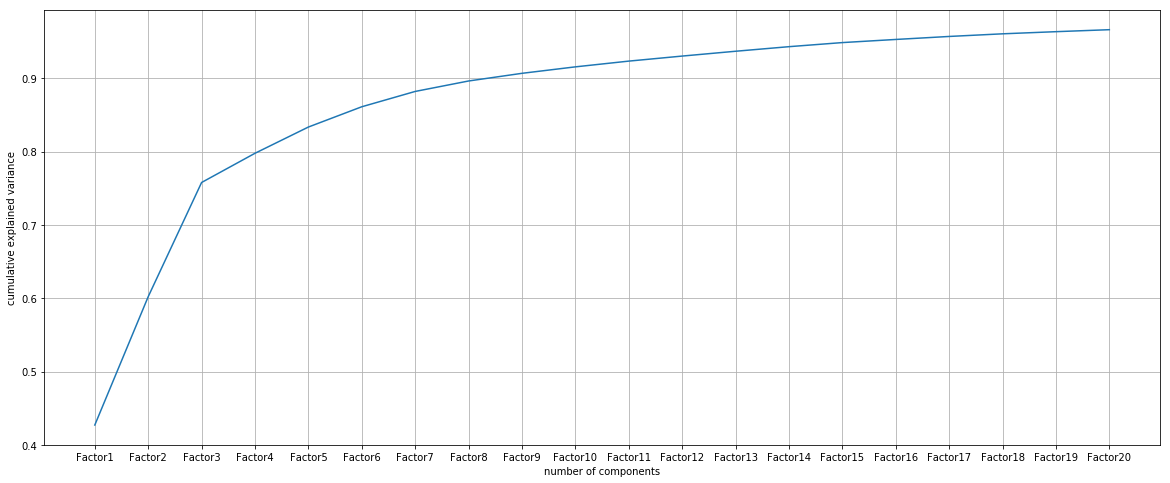

In [34]:
plt.figure(figsize=(20,8))
plt.plot(df_variance['Cumulative_Var'])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

## Final Data Frame 

In [35]:
fa.transform(x).shape


(41266, 20)

In [36]:
final_df = pd.DataFrame(fa.transform(x), columns=factor)
final_df.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
0,-2.192128,-0.135473,0.793566,1.028677,0.104130,1.138011,0.112900,1.677940,0.137758,-0.704254,0.300836,-0.646720,-2.133074,0.525687,-1.380292,0.748939,-1.455323,2.547991,-1.240679,-0.283557
1,-2.101224,-0.264923,0.617356,0.566504,0.247244,1.209262,0.157743,1.717098,-0.188827,-0.927261,0.522962,-0.058404,-2.111356,1.581069,-1.481501,2.456009,-1.923710,2.488604,-0.235775,0.646126
2,-2.125768,-0.246824,0.640870,0.320564,-0.007515,1.386179,-0.081198,1.453215,0.308468,0.084122,-0.081193,-0.164305,-2.779305,1.283938,-0.040669,2.753406,-2.495733,1.992783,-0.257650,0.817569
3,-2.155230,-0.233712,0.670627,0.465148,0.330552,1.626261,-0.260838,1.345606,-0.445151,0.129615,-0.283451,0.311342,-2.533125,0.323177,0.050139,3.407129,-2.816959,0.795156,-0.420494,0.125705
4,-2.235227,-0.292147,0.835242,0.176183,0.314922,1.969120,-0.446807,1.280584,-0.003987,0.956487,-0.751147,-0.338477,-2.956137,0.872487,0.265530,3.377404,-4.354031,1.672353,-1.213188,0.250454


# ============PCA ============ 

In [37]:
from sklearn.decomposition import PCA
#selecting n_components=20 
pca2 = PCA(n_components=20, random_state=101)

pca2.fit(x)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=101,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
print("Principal components:")
print(pca2.components_)

print("---")
print("Compressed - :")
print(pca2.transform(x)[:5,:]) # first 5 obs

print("---")
print("Reconstructed - :")
print(pca2.inverse_transform(pca2.transform(x))[:5,:]) # first 5 obs
print("Original Normalized:\n",x[:5,:])

Principal components:
[[-0.03925756 -0.04106421 -0.0629084  ... -0.06247664  0.00253829
  -0.05169773]
 [-0.06428354  0.033861    0.00186129 ... -0.02040637 -0.08122924
  -0.05950068]
 [-0.03985758  0.06416494  0.01207933 ...  0.02101011 -0.06637293
   0.02356977]
 ...
 [-0.0059854  -0.04778229  0.00105553 ...  0.01156035 -0.01578741
   0.01909682]
 [-0.01415827  0.0219166   0.01191892 ...  0.00297235  0.04738365
   0.01423189]
 [-0.0054765  -0.0334279  -0.04155704 ...  0.02502488 -0.03753776
  -0.00727275]]
---
Compressed - :
[[25.55018064 10.00580482 -9.38207446 -2.978823   -1.51175645 -1.84368553
  -0.77807016 -3.94489274  4.11501324  1.62127595  1.45463272 -0.5857997
  -2.72220334  0.27547819 -1.75068804 -2.43546865 -1.56479734 -0.72633795
   1.87842126  2.56363664]
 [25.64880185  9.89282687 -9.8023104  -2.56778753 -1.45183403 -2.0287385
  -0.89210888 -3.92526677  3.93763865  1.54757988  1.55455142 -0.57592869
  -3.01721006  0.13729819 -1.90291063 -2.55162972 -1.38812127 -0.6897199

In [39]:
# variance = pca2.explained_variance_
# print(variance)

variance_ratio = pca2.explained_variance_ratio_
print(variance_ratio)


#printing cumulative sum of features variance

np.cumsum(pca2.explained_variance_ratio_)  

[0.47030575 0.17232375 0.12020431 0.04854486 0.0379879  0.02808016
 0.02000439 0.01306217 0.0104897  0.00751694 0.00682657 0.00578192
 0.00464146 0.00449782 0.00405648 0.00345416 0.00331522 0.00256721
 0.00232138 0.00217321]


array([0.47030575, 0.64262949, 0.7628338 , 0.81137866, 0.84936657,
       0.87744673, 0.89745112, 0.91051329, 0.92100298, 0.92851992,
       0.93534649, 0.94112841, 0.94576987, 0.95026769, 0.95432417,
       0.95777833, 0.96109355, 0.96366076, 0.96598213, 0.96815535])

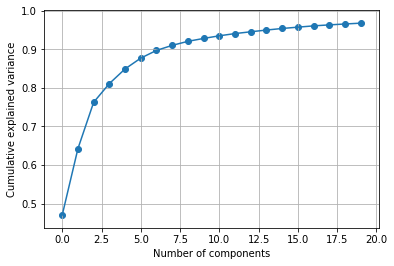

In [40]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.scatter(range(20),np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

**Observation:** 95.00% variance is a good %, so we can choose components till that only, means 13 or 14 coomponents

### Final Reduced Feature Matrix x_transformed

In [41]:
x_transformed = pca2.transform(x)

In [42]:
x_transformed.shape

(41266, 20)

In [43]:
x_transformed[:5]

array([[25.55018064, 10.00580482, -9.38207446, -2.978823  , -1.51175645,
        -1.84368553, -0.77807016, -3.94489274,  4.11501324,  1.62127595,
         1.45463272, -0.5857997 , -2.72220334,  0.27547819, -1.75068804,
        -2.43546865, -1.56479734, -0.72633795,  1.87842126,  2.56363664],
       [25.64880185,  9.89282687, -9.8023104 , -2.56778753, -1.45183403,
        -2.0287385 , -0.89210888, -3.92526677,  3.93763865,  1.54757988,
         1.55455142, -0.57592869, -3.01721006,  0.13729819, -1.90291063,
        -2.55162972, -1.38812127, -0.68971995,  1.85239788,  2.59062216],
       [25.56345929,  9.82533675, -9.67570287, -2.86864573, -1.54701638,
        -1.94471936, -0.82851128, -4.01110402,  3.95543815,  1.65320356,
         1.67160564, -0.68076683, -2.92182196,  0.16077885, -1.88159751,
        -2.33884291, -1.43058943, -0.79560263,  1.77446818,  2.64723829],
       [25.66861205,  9.99439559, -9.17339345, -3.05610009, -1.41180447,
        -2.03383599, -0.73092057, -4.03986218,  

# Problem 2 
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.


   - **Solution:** to find Unique patterns, we need to cluster datasets in to otimized no. of clusters

In [44]:
#Original Scaled dataset
print("Transformed Matrix:\n",x_transformed[:5])
print("Shape of Transformed matrix:\n",x_transformed.shape)

Transformed Matrix:
 [[25.55018064 10.00580482 -9.38207446 -2.978823   -1.51175645 -1.84368553
  -0.77807016 -3.94489274  4.11501324  1.62127595  1.45463272 -0.5857997
  -2.72220334  0.27547819 -1.75068804 -2.43546865 -1.56479734 -0.72633795
   1.87842126  2.56363664]
 [25.64880185  9.89282687 -9.8023104  -2.56778753 -1.45183403 -2.0287385
  -0.89210888 -3.92526677  3.93763865  1.54757988  1.55455142 -0.57592869
  -3.01721006  0.13729819 -1.90291063 -2.55162972 -1.38812127 -0.68971995
   1.85239788  2.59062216]
 [25.56345929  9.82533675 -9.67570287 -2.86864573 -1.54701638 -1.94471936
  -0.82851128 -4.01110402  3.95543815  1.65320356  1.67160564 -0.68076683
  -2.92182196  0.16077885 -1.88159751 -2.33884291 -1.43058943 -0.79560263
   1.77446818  2.64723829]
 [25.66861205  9.99439559 -9.17339345 -3.05610009 -1.41180447 -2.03383599
  -0.73092057 -4.03986218  3.96094495  1.7417851   1.70665595 -0.65130143
  -2.79446117  0.17134735 -1.68372907 -2.19530247 -1.39445926 -0.89457251
   1.7624957

In [45]:
# first trying 5 clusters
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=5)
kmeans.fit(x_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:

all_cluster = range(1,25)
cluster_error = []
for i in all_cluster:
    kmeans = KMeans(n_clusters=i).fit(x_transformed)
    cluster_error.append(kmeans.inertia_)
    
cluster_df = pd.DataFrame({'Cluster No.':all_cluster, 'Cluster Error':cluster_error})

In [47]:
cluster_df

,Cluster No.,Cluster Error
0,1,1.997595e+07
1,2,1.219048e+07
2,3,8.459651e+06
3,4,6.295777e+06
4,5,4.863097e+06
5,6,4.043105e+06
6,7,3.351724e+06
7,8,2.950065e+06
8,9,2.526323e+06
9,10,2.246949e+06


### Evaluating K-Means Clustering- to find optimal no. of clusters

The K-Means clustering can be evaluated using either Elbow Criterion or Silhouette Coefficient.

**1. Elbow Criterion Method:**

   - The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=1 to 25 in our case), and for each value of k, calculate sum of squared errors (SSE).

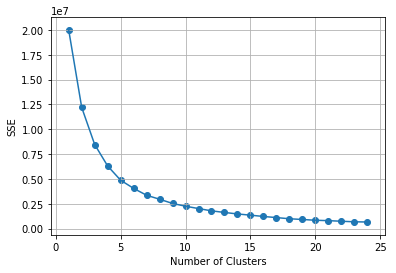

In [48]:
plt.plot(cluster_df['Cluster No.'],cluster_df['Cluster Error'])
plt.scatter(cluster_df['Cluster No.'],cluster_df['Cluster Error'])
plt.xlabel('Number of Clusters')
plt.ylabel('SSE') ## Inertia: Sum of distances of samples to their closest cluster center(Sum of Squared Errors)

plt.grid()
plt.show()

**Observation:** After that, plot a line graph of the SSE for each value of k. If the line graph looks like an arm - , the "elbow" (between 5 to 10) on the arm is the value of optimal k (number of cluster). I am choosing k=7

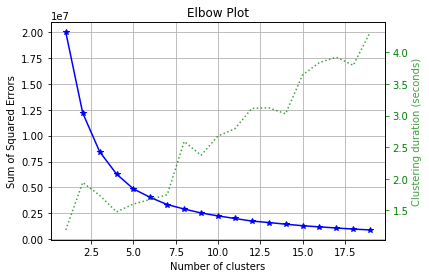

In [49]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),x_transformed,cluster_ranges=range(1,20))

In [50]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Clustering Labels to Complete Dataset

In [51]:
y_kmeans, len(y_kmeans)

(array([3, 3, 3, ..., 6, 6, 6]), 41266)

In [52]:
label = kmeans.labels_
print("Unique Cluster Labels:",np.unique(label))

Unique Cluster Labels: [0 1 2 3 4 5 6]


**2. Silhouette Coefficient[-1 0 1] Method:**

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `

   - a: The mean distance between a sample and all other points in the same class.

   - b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

s=b-a/max(a,b)

Now, to find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [53]:
from sklearn.metrics import silhouette_score
try:
    sil_score = []
    for k in range(2, 9):
        kmeans = KMeans(n_clusters=k).fit(x_transformed)
        label = kmeans.labels_
        sil_coeff = silhouette_score(x_transformed, label, metric='euclidean', sample_size=15000, random_state=10)
        sil_score.append(sil_coeff)
        print("For k={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    
except:
    print("Error")


For k=2, The Silhouette Coefficient is 0.3643862306614757
For k=3, The Silhouette Coefficient is 0.390095307011828
For k=4, The Silhouette Coefficient is 0.3993010317740101
For k=5, The Silhouette Coefficient is 0.4262184619174691
For k=6, The Silhouette Coefficient is 0.42801945906967775
For k=7, The Silhouette Coefficient is 0.4427314164031111
For k=8, The Silhouette Coefficient is 0.44219190853522977


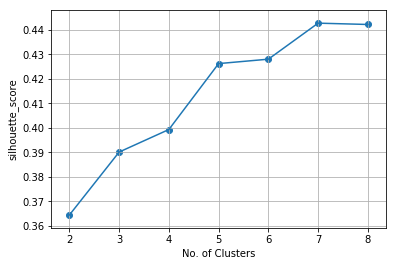

In [54]:
#ploting silhouette_score
plt.plot(range(2,9),sil_score)
plt.scatter(range(2,9),sil_score)
plt.xlabel('No. of Clusters')
plt.ylabel('silhouette_score')
plt.grid()
plt.show()

**Ovservation:** while having 7 cluster silhouette_score is .44 (.45 approx.) which is highest so 7 is an optimal choice

### Ploting 7 Clusters

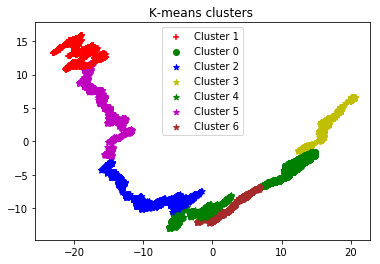

In [55]:
for i in range(41266):
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='b',    marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='y',    marker='*')
    elif kmeans.labels_[i] == 4:
        c5 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='g',    marker='*')
    elif kmeans.labels_[i] == 5:
        c6 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='m',    marker='*')
    elif kmeans.labels_[i] == 6:
        c7 = plt.scatter(x_transformed[i,0],x_transformed[i,1],c='brown',    marker='*')
plt.legend([c1, c2, c3, c4, c5, c6, c7],['Cluster 1', 'Cluster 0', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5', 'Cluster 6'])
plt.title('K-means clusters ')
plt.show()

Clusters Plot by taking first two PCA(transformed matrix columns) Components

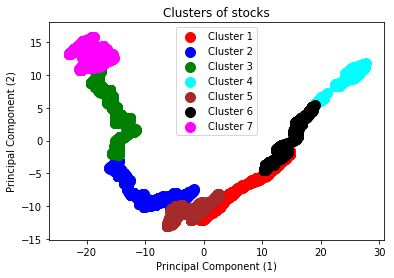

In [56]:
plt.scatter(x_transformed[y_kmeans == 0, 0], x_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_transformed[y_kmeans == 1, 0], x_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_transformed[y_kmeans == 2, 0], x_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x_transformed[y_kmeans == 3, 0], x_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_transformed[y_kmeans == 4, 0], x_transformed[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(x_transformed[y_kmeans == 5, 0], x_transformed[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(x_transformed[y_kmeans == 6, 0], x_transformed[y_kmeans == 6, 1], s = 100, c = 'magenta', label = 'Cluster 7')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

# Problem 3
Identify which all stocks are moving together and which all stocks are different from each other.

In [57]:
# Get a tuple of unique values & their first index location from a numpy array
uniqueValues, numberOfCounts = np.unique(label, return_counts=True)
 
print('Unique Values : ', uniqueValues)
print('Indices of Unique Values : ', numberOfCounts)
print(sum(numberOfCounts))

Unique Values :  [0 1 2 3 4 5 6 7]
Indices of Unique Values :  [4300 6236 6859 4691 5298 4320 4086 5476]
41266


In [58]:
for stock_type, count in zip(uniqueValues,numberOfCounts):
    print(f"stock type labeled {stock_type} in counting {count} performing similar")

stock type labeled 0 in counting 4300 performing similar
stock type labeled 1 in counting 6236 performing similar
stock type labeled 2 in counting 6859 performing similar
stock type labeled 3 in counting 4691 performing similar
stock type labeled 4 in counting 5298 performing similar
stock type labeled 5 in counting 4320 performing similar
stock type labeled 6 in counting 4086 performing similar
stock type labeled 7 in counting 5476 performing similar


**Note: If we want seperation of the differnt performing stocks not only counting, we can insert y_kmeans labels in to data frame and can groupby our dataset rows according to labels**